In [ ]:
!pip install tensorflow
!pip install tf-nightly
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install PIL
!pip install scikit-learn


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for PIL



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from collections import Counter
import random
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix


ModuleNotFoundError: No module named 'sklearn'

Current directory: c:\Users\User\Desktop\papka uni\year_2\AI\MachineLearningProject\dinosaur-challenge\piegeons2
Checking for the './train' directory...
Found 7 potential class directories in ./train/train: ['Ankylosaurus', 'Diplodocus', 'Parasaurolophus', 'Stegosaurus', 'Trex', 'Triceratops', 'Velociraptor']
Found 7 expected dinosaur classes: ['Ankylosaurus', 'Diplodocus', 'Parasaurolophus', 'Stegosaurus', 'Trex', 'Triceratops', 'Velociraptor']

========= DATASET STRUCTURE =========
Exploring dataset structure in: ./train/train
Found 7 dinosaur classes: ['Ankylosaurus', 'Diplodocus', 'Parasaurolophus', 'Stegosaurus', 'Trex', 'Triceratops', 'Velociraptor']
Total number of images: 1269
  - Ankylosaurus: 152 images
  - Diplodocus: 195 images
  - Parasaurolophus: 197 images
  - Stegosaurus: 147 images
  - Trex: 151 images
  - Triceratops: 205 images
  - Velociraptor: 222 images

========= IMAGE PROPERTIES =========
Analyzing image properties (sampling 50 images)...

========= CLASS DISTRI

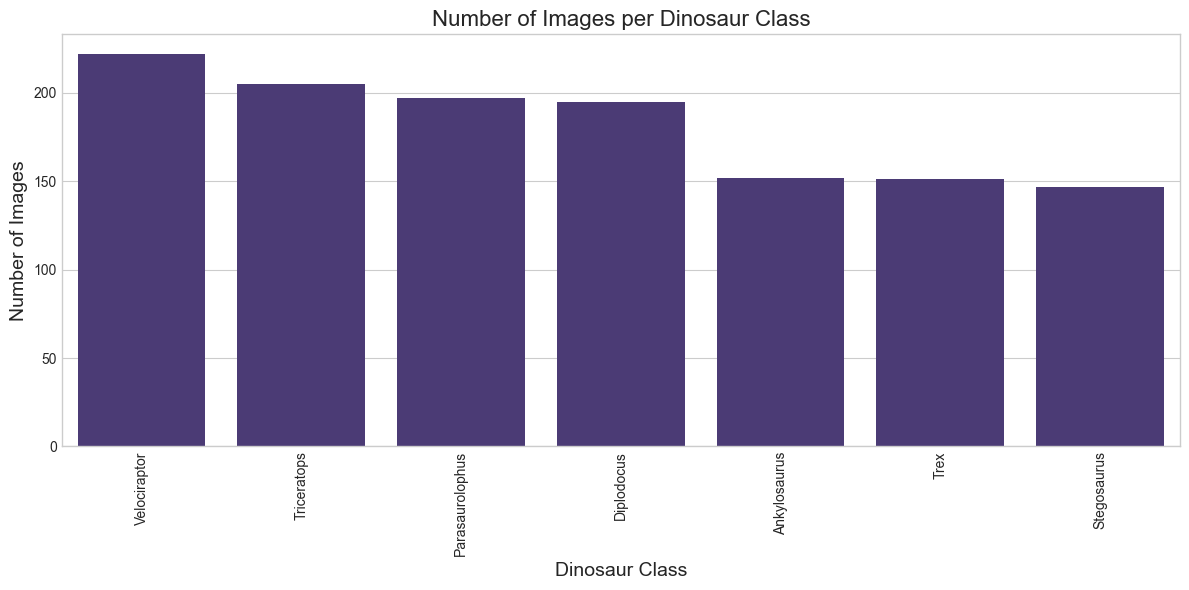

Class distribution statistics:
  - Minimum class size: 147 images
  - Maximum class size: 222 images
  - Average class size: 181.29 images
  - Imbalance ratio (max/min): 1.51

========= IMAGE PROPERTIES VISUALIZATION =========


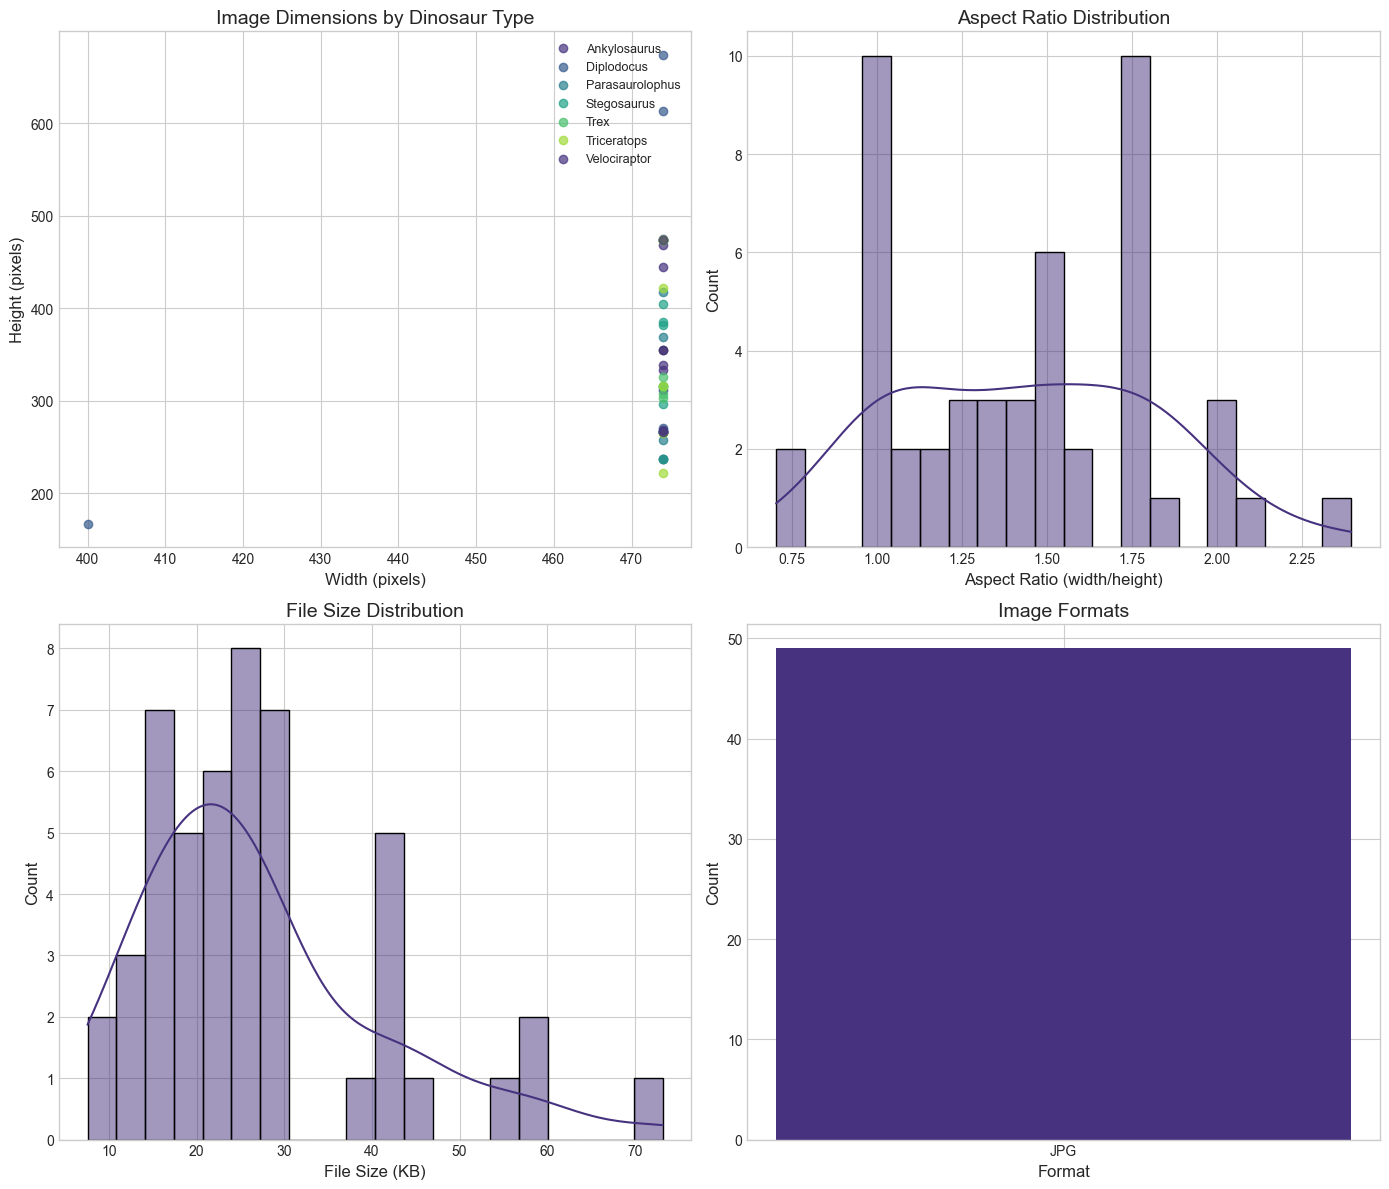

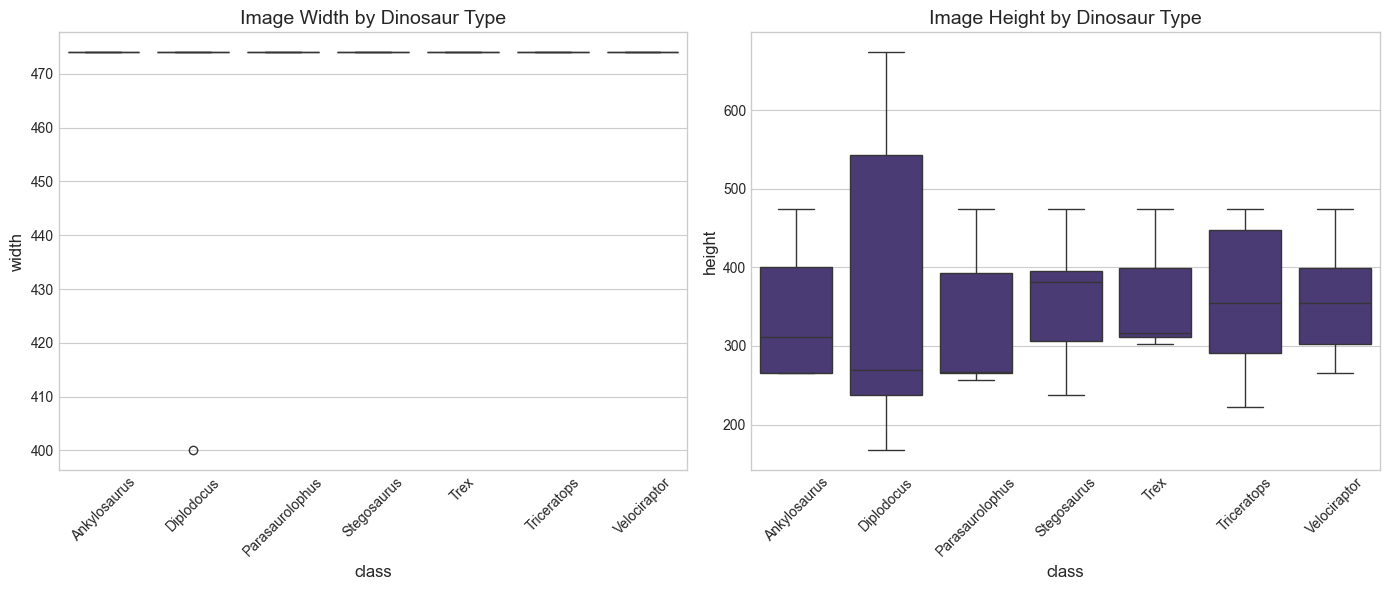


Image properties summary:
  - Dimensions: Average 472.5x355.3 pixels
  - Aspect ratio: Mean 1.44, Median 1.46
  - File size: Mean 27.3 KB, Median 24.0 KB
  - Image formats: {'JPG': 49}

Per-class image dimension summary:
  - Ankylosaurus: Average 474.0x340.9 pixels
  - Diplodocus: Average 463.4x381.7 pixels
  - Parasaurolophus: Average 474.0x331.0 pixels
  - Stegosaurus: Average 474.0x356.4 pixels
  - Trex: Average 474.0x359.1 pixels
  - Triceratops: Average 474.0x361.1 pixels
  - Velociraptor: Average 474.0x357.1 pixels

========= SAMPLE IMAGES =========


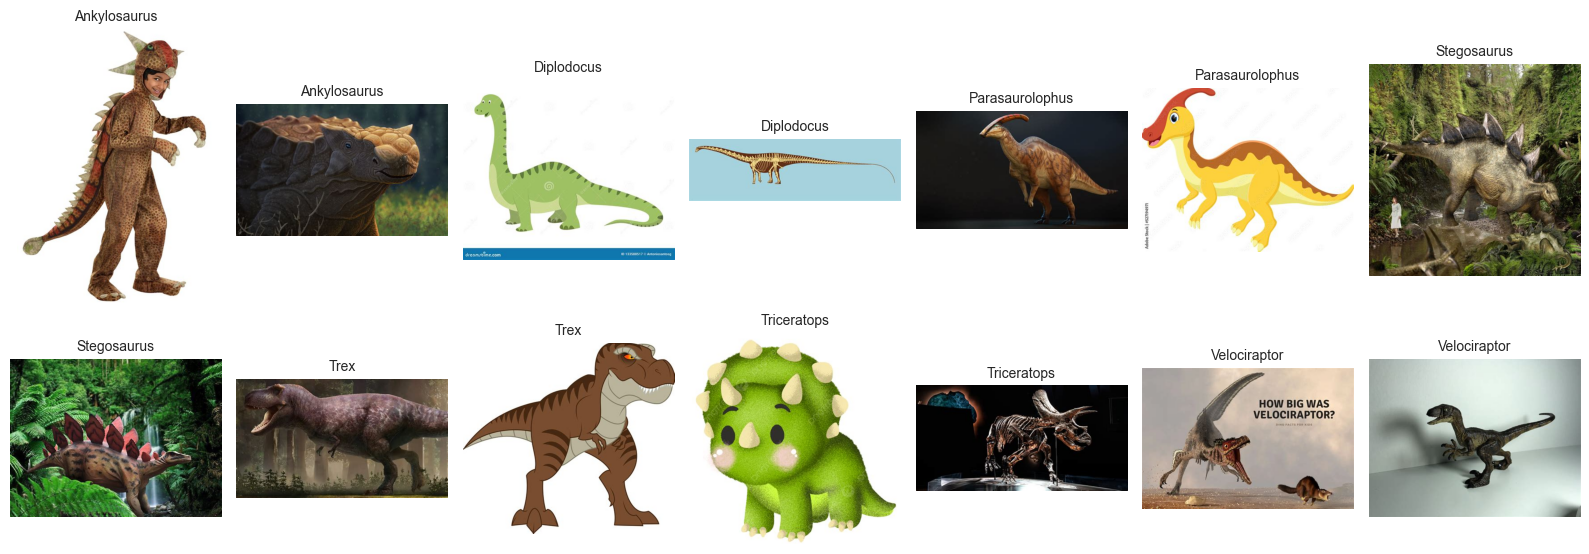


========= DATA QUALITY CHECK =========

Checking for data quality issues...
✓ No corrupted images found in sample of 350 images.

========= SUMMARY & RECOMMENDATIONS =========
Dataset summary:
  - 7 dinosaur classes
  - 1269 total images

No major data quality issues detected.

Recommendations for neural network development:
  - Recommended input size for neural network: 360x360 pixels
  - Consider using transfer learning with pre-trained models (e.g., ResNet, EfficientNet)
  - Apply standard augmentation techniques: rotation, flipping, color jitter


In [ ]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter

# Set up the figure style for nice visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

def explore_dataset_structure(data_dir):
    """Explore the directory structure of the dataset."""
    print(f"Exploring dataset structure in: {data_dir}")
    
    # Check if the directory exists
    if not os.path.exists(data_dir):
        print(f"Directory {data_dir} does not exist!")
        return None
    
    # Get all dinosaur classes (assuming each subfolder is a class)
    classes = []
    for d in os.listdir(data_dir):
        if os.path.isdir(os.path.join(data_dir, d)) and d != 'train':  # Exclude 'train' as a class
            classes.append(d)
    
    if not classes:
        print("No class subfolders found in the data directory!")
        print("Available items in directory:", os.listdir(data_dir))
        return None
    
    print(f"Found {len(classes)} dinosaur classes: {classes}")
    
    # Count images per class
    class_counts = {}
    total_images = 0
    
    for cls in classes:
        class_dir = os.path.join(data_dir, cls)
        image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff']
        image_files = [f for f in os.listdir(class_dir) if any(f.lower().endswith(ext) for ext in image_extensions)]
        class_counts[cls] = len(image_files)
        total_images += len(image_files)
    
    print(f"Total number of images: {total_images}")
    
    # Print class-specific counts
    for cls, count in class_counts.items():
        print(f"  - {cls}: {count} images")
    
    # Return dataset structure info
    return {
        "data_dir": data_dir,
        "classes": classes,
        "class_counts": class_counts,
        "total_images": total_images
    }

def analyze_image_properties(data_dir, dataset_info, sample_size=50):
    """Analyze image properties such as dimensions, formats, and file sizes."""
    classes = dataset_info["classes"]
    
    # Prepare to collect image properties
    image_sizes = []  # (width, height)
    aspect_ratios = []
    formats = []
    file_sizes = []  # in KB
    class_labels = []  # Track which class each image belongs to
    
    # Sample images from each class
    total_samples = min(sample_size, dataset_info["total_images"])
    
    # Safety check: if no images or classes, return empty DataFrame
    if total_samples == 0 or len(classes) == 0:
        print("No images to analyze!")
        return pd.DataFrame(columns=['width', 'height', 'aspect_ratio', 'format', 'file_size_kb', 'class'])
    
    samples_per_class = max(1, total_samples // len(classes))
    
    print(f"Analyzing image properties (sampling {total_samples} images)...")
    
    for cls in classes:
        class_dir = os.path.join(data_dir, cls)
        
        image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff']
        image_files = [f for f in os.listdir(class_dir) if any(f.lower().endswith(ext) for ext in image_extensions)]
        
        # Sample images from this class
        if len(image_files) > 0:
            sampled_files = random.sample(image_files, min(samples_per_class, len(image_files)))
            
            for img_file in sampled_files:
                img_path = os.path.join(class_dir, img_file)
                
                # Get file size
                file_size = os.path.getsize(img_path) / 1024  # Convert to KB
                file_sizes.append(file_size)
                
                # Get image format
                format_ext = os.path.splitext(img_file)[1][1:].upper()
                formats.append(format_ext)
                
                # Track class label
                class_labels.append(cls)
                
                # Get image dimensions
                try:
                    with Image.open(img_path) as img:
                        width, height = img.size
                        image_sizes.append((width, height))
                        aspect_ratios.append(width / height)
                except Exception as e:
                    print(f"Error processing image {img_path}: {e}")
    
    # If no images were processed, return empty DataFrame
    if not image_sizes:
        print("No images were successfully processed!")
        return pd.DataFrame(columns=['width', 'height', 'aspect_ratio', 'format', 'file_size_kb', 'class'])
    
    # Create DataFrame for image properties
    widths, heights = zip(*image_sizes)  # Safely unpack the tuples
    
    image_props_df = pd.DataFrame({
        'width': widths,
        'height': heights,
        'aspect_ratio': aspect_ratios,
        'format': formats,
        'file_size_kb': file_sizes,
        'class': class_labels
    })
    
    return image_props_df

def visualize_class_distribution(dataset_info):
    """Visualize the distribution of images across classes."""
    class_counts = dataset_info["class_counts"]
    
    # Check if there are classes to visualize
    if not class_counts:
        print("No classes to visualize distribution for!")
        return {}
    
    # Sort classes by count
    sorted_classes = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
    classes, counts = zip(*sorted_classes)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(classes), y=list(counts))
    plt.title('Number of Images per Dinosaur Class', fontsize=16)
    plt.xlabel('Dinosaur Class', fontsize=14)
    plt.ylabel('Number of Images', fontsize=14)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
    # Check class imbalance
    min_count = min(counts)
    max_count = max(counts)
    avg_count = sum(counts) / len(counts)
    
    print(f"Class distribution statistics:")
    print(f"  - Minimum class size: {min_count} images")
    print(f"  - Maximum class size: {max_count} images")
    print(f"  - Average class size: {avg_count:.2f} images")
    print(f"  - Imbalance ratio (max/min): {max_count/min_count:.2f}")
    
    return {
        "min_count": min_count,
        "max_count": max_count,
        "avg_count": avg_count,
        "imbalance_ratio": max_count/min_count
    }

def visualize_image_properties(image_props_df):
    """Visualize image properties distributions."""
    # Check if DataFrame is empty
    if image_props_df.empty:
        print("No image properties to visualize!")
        return
    
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    
    # Image dimensions scatter plot
    for dinosaur in image_props_df['class'].unique():
        subset = image_props_df[image_props_df['class'] == dinosaur]
        axes[0, 0].scatter(subset['width'], subset['height'], alpha=0.7, label=dinosaur)
    
    axes[0, 0].set_title('Image Dimensions by Dinosaur Type', fontsize=14)
    axes[0, 0].set_xlabel('Width (pixels)', fontsize=12)
    axes[0, 0].set_ylabel('Height (pixels)', fontsize=12)
    axes[0, 0].legend(loc='upper right', fontsize=9)
    
    # Aspect ratio histogram
    sns.histplot(image_props_df['aspect_ratio'], bins=20, kde=True, ax=axes[0, 1])
    axes[0, 1].set_title('Aspect Ratio Distribution', fontsize=14)
    axes[0, 1].set_xlabel('Aspect Ratio (width/height)', fontsize=12)
    
    # File size histogram
    sns.histplot(image_props_df['file_size_kb'], bins=20, kde=True, ax=axes[1, 0])
    axes[1, 0].set_title('File Size Distribution', fontsize=14)
    axes[1, 0].set_xlabel('File Size (KB)', fontsize=12)
    
    # Image format count
    format_counts = Counter(image_props_df['format'])
    formats, format_counts = zip(*format_counts.items())
    axes[1, 1].bar(formats, format_counts)
    axes[1, 1].set_title('Image Formats', fontsize=14)
    axes[1, 1].set_xlabel('Format', fontsize=12)
    axes[1, 1].set_ylabel('Count', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Additional plot: Box plot of image dimensions by dinosaur class
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x='class', y='width', data=image_props_df)
    plt.title('Image Width by Dinosaur Type', fontsize=14)
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='class', y='height', data=image_props_df)
    plt.title('Image Height by Dinosaur Type', fontsize=14)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nImage properties summary:")
    print(f"  - Dimensions: Average {image_props_df['width'].mean():.1f}x{image_props_df['height'].mean():.1f} pixels")
    print(f"  - Aspect ratio: Mean {image_props_df['aspect_ratio'].mean():.2f}, Median {image_props_df['aspect_ratio'].median():.2f}")
    print(f"  - File size: Mean {image_props_df['file_size_kb'].mean():.1f} KB, Median {image_props_df['file_size_kb'].median():.1f} KB")
    print(f"  - Image formats: {dict(zip(formats, format_counts))}")
    
    # Per-class statistics
    print("\nPer-class image dimension summary:")
    for cls in image_props_df['class'].unique():
        subset = image_props_df[image_props_df['class'] == cls]
        print(f"  - {cls}: Average {subset['width'].mean():.1f}x{subset['height'].mean():.1f} pixels")

def check_data_quality(data_dir, dataset_info, image_props_df=None):
    """Check for potential data quality issues."""
    classes = dataset_info["classes"]
    issues = []
    
    # Check if dataset is empty
    if not classes or dataset_info["total_images"] == 0:
        issues.append("Dataset is empty or has no valid images")
        print("⚠️ Dataset is empty or has no valid images")
        return issues
    
    print("\nChecking for data quality issues...")
    
    # Check for corrupted images
    corrupted_count = 0
    total_checked = 0
    corrupted_by_class = {cls: 0 for cls in classes}
    
    for cls in classes:
        class_dir = os.path.join(data_dir, cls)
        
        image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff']
        image_files = [f for f in os.listdir(class_dir) if any(f.lower().endswith(ext) for ext in image_extensions)]
        
        # Check a sample of images (or all if few)
        sample_size = min(len(image_files), 50)
        sampled_files = random.sample(image_files, sample_size) if len(image_files) > 50 else image_files
        
        for img_file in sampled_files:
            total_checked += 1
            img_path = os.path.join(class_dir, img_file)
            
            try:
                with Image.open(img_path) as img:
                    # Try to load the image data
                    img.load()
            except Exception as e:
                corrupted_count += 1
                corrupted_by_class[cls] += 1
                issues.append(f"Corrupted image in {cls}: {img_file} - {str(e)}")
    
    if corrupted_count > 0:
        print(f"⚠️ Found {corrupted_count} corrupted images out of {total_checked} checked.")
        for cls, count in corrupted_by_class.items():
            if count > 0:
                print(f"  - {cls}: {count} corrupted images")
    else:
        print(f"✓ No corrupted images found in sample of {total_checked} images.")
    
    # Check for class imbalance
    if "imbalance_ratio" in dataset_info and dataset_info["imbalance_ratio"] > 3:
        issues.append(f"Significant class imbalance detected (ratio: {dataset_info['imbalance_ratio']:.2f})")
        print(f"⚠️ Significant class imbalance detected (ratio: {dataset_info['imbalance_ratio']:.2f})")
        
        # Identify smallest and largest classes
        class_counts = dataset_info["class_counts"]
        smallest_class = min(class_counts.items(), key=lambda x: x[1])
        largest_class = max(class_counts.items(), key=lambda x: x[1])
        
        print(f"  - Smallest class: {smallest_class[0]} with {smallest_class[1]} images")
        print(f"  - Largest class: {largest_class[0]} with {largest_class[1]} images")
    
    # Check for very small or very large images
    if image_props_df is not None and not image_props_df.empty:
        small_images = image_props_df[(image_props_df['width'] < 100) | (image_props_df['height'] < 100)]
        if len(small_images) > 0:
            issues.append(f"Found {len(small_images)} very small images (< 100px in either dimension)")
            print(f"⚠️ Found {len(small_images)} very small images that might affect model training")
        
        large_images = image_props_df[(image_props_df['width'] > 1000) | (image_props_df['height'] > 1000)]
        if len(large_images) > 0:
            issues.append(f"Found {len(large_images)} very large images (> 1000px in either dimension)")
            print(f"⚠️ Found {len(large_images)} very large images that might consume excessive memory")
    
    # Return data quality issues
    return issues

def visualize_sample_images(data_dir, dataset_info, samples_per_class=2):
    """Visualize sample images from each class."""
    classes = dataset_info["classes"]
    
    if not classes:
        print("No classes to sample images from!")
        return
    
    # Determine grid size
    total_samples = min(len(classes) * samples_per_class, 14)  # 2 samples for each of your 7 dinosaur types
    
    # Create a grid for displaying images
    n_cols = min(7, samples_per_class * len(classes))  # One column per dinosaur type works well for 7 classes
    n_rows = (total_samples + n_cols - 1) // n_cols
    
    plt.figure(figsize=(16, 3 * n_rows))
    
    img_count = 0
    for i, cls in enumerate(classes):
        class_dir = os.path.join(data_dir, cls)
        
        image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff']
        image_files = [f for f in os.listdir(class_dir) if any(f.lower().endswith(ext) for ext in image_extensions)]
        
        if not image_files:
            continue
        
        # Sample images from this class
        sampled_files = random.sample(image_files, min(samples_per_class, len(image_files)))
        
        for j, img_file in enumerate(sampled_files):
            if img_count >= total_samples:
                break
                
            img_path = os.path.join(class_dir, img_file)
            
            try:
                # Read and display the image
                img = Image.open(img_path)
                
                plt.subplot(n_rows, n_cols, img_count + 1)
                plt.imshow(img)
                plt.title(f"{cls}", fontsize=10)
                plt.axis('off')
                
                img_count += 1
            except Exception as e:
                print(f"Error displaying image {img_path}: {e}")
    
    if img_count > 0:
        plt.tight_layout()
        plt.show()
    else:
        print("No images to display!")

def main():
    # Set the path to your dinosaur images folder
    # This is usually the directory containing Ankylosaurus, Diplodocus, etc. folders
    data_dir = "./train/train"
    
    # First, check the directory structure
    print("Current directory:", os.getcwd())
    print("Checking for the './train' directory...")
    
    if not os.path.exists(data_dir):
        print(f"The directory '{data_dir}' does not exist!")
        print("Available items in current directory:", os.listdir("."))
        return
    
    # Check if the train directory contains dinosaur subfolders
    train_contents = os.listdir(data_dir)
    potential_classes = [d for d in train_contents if os.path.isdir(os.path.join(data_dir, d))]
    
    print(f"Found {len(potential_classes)} potential class directories in {data_dir}: {potential_classes}")
    
    # Check if any of these match expected dinosaur classes
    expected_classes = ["Ankylosaurus", "Diplodocus", "Parasaurolophus", "Stegosaurus", "Trex", "Triceratops", "Velociraptor"]
    found_expected = [cls for cls in potential_classes if cls in expected_classes]
    
    if found_expected:
        print(f"Found {len(found_expected)} expected dinosaur classes: {found_expected}")
    else:
        # Maybe dinosaur folders are in a different location
        # Check if there are directories that might be dinosaur classes
        print("No expected dinosaur classes found in ./train.")
        print("Looking for dinosaur classes in current directory...")
        
        current_dir_contents = os.listdir(".")
        potential_dinosaur_dirs = [d for d in current_dir_contents if os.path.isdir(d) and d in expected_classes]
        
        if potential_dinosaur_dirs:
            print(f"Found potential dinosaur class directories in current directory: {potential_dinosaur_dirs}")
            data_dir = "."  # Use current directory instead of ./train
        else:
            print("Could not find dinosaur class directories.")
            print("Please check that your directory structure is correct.")
            print("Expected structure: ./train/[Ankylosaurus, Diplodocus, etc.]")
            return
    
    # Now run the analysis
    print("\n========= DATASET STRUCTURE =========")
    dataset_info = explore_dataset_structure(data_dir)
    
    if dataset_info is None or not dataset_info["classes"]:
        print("Failed to explore the dataset. Please check the data directory structure.")
        return
    
    # Cell 2: Analyze image properties
    print("\n========= IMAGE PROPERTIES =========")
    image_props_df = analyze_image_properties(data_dir, dataset_info)
    
    if image_props_df.empty:
        print("No image properties to analyze. Exiting.")
        return
    
    # Cell 3: Visualize class distribution
    print("\n========= CLASS DISTRIBUTION =========")
    distribution_stats = visualize_class_distribution(dataset_info)
    dataset_info.update(distribution_stats)
    
    # Cell 4: Visualize image properties
    print("\n========= IMAGE PROPERTIES VISUALIZATION =========")
    visualize_image_properties(image_props_df)
    
    # Cell 5: Display sample images
    print("\n========= SAMPLE IMAGES =========")
    visualize_sample_images(data_dir, dataset_info)
    
    # Cell 6: Check for data quality issues
    print("\n========= DATA QUALITY CHECK =========")
    issues = check_data_quality(data_dir, dataset_info, image_props_df)
    
    # Cell 7: Summary and recommendations
    print("\n========= SUMMARY & RECOMMENDATIONS =========")
    print(f"Dataset summary:")
    print(f"  - {len(dataset_info['classes'])} dinosaur classes")
    print(f"  - {dataset_info['total_images']} total images")
    
    if issues:
        print("\nData quality issues found:")
        for issue in issues:
            print(f"  - {issue}")
    else:
        print("\nNo major data quality issues detected.")
    
    print("\nRecommendations for neural network development:")
    if "imbalance_ratio" in dataset_info and dataset_info["imbalance_ratio"] > 2:
        print("  - Consider data augmentation or balancing techniques for underrepresented classes")
    
    if not image_props_df.empty:
        # Image size recommendations based on analysis
        width_mean = image_props_df['width'].mean()
        height_mean = image_props_df['height'].mean()
        target_size = max(224, min(int(round(width_mean, -1)), int(round(height_mean, -1))))
        
        print(f"  - Recommended input size for neural network: {target_size}x{target_size} pixels")
    else:
        print("  - Recommended input size for neural network: 224x224 pixels (default)")
    
    print("  - Consider using transfer learning with pre-trained models (e.g., ResNet, EfficientNet)")
    print("  - Apply standard augmentation techniques: rotation, flipping, color jitter")

if __name__ == "__main__":
    main()

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

# Display TensorFlow version and GPU availability
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

def create_data_generators(data_dir, img_size=224, batch_size=32):
    """Create train and validation data generators."""
    # Define data augmentation for training
    train_datagen = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2  # 20% for validation
    )
    
    # Only rescaling for validation
    valid_datagen = ImageDataGenerator(
        rescale=1.0/255,
        validation_split=0.2
    )
    
    # Create training generator
    train_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )
    
    # Create validation generator
    valid_generator = valid_datagen.flow_from_directory(
        data_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        shuffle=False
    )
    
    return train_generator, valid_generator

def build_model(input_shape, num_classes):
    """Build a transfer learning model using EfficientNetB0."""
    # Load pre-trained model
    base_model = EfficientNetB0(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )
    
    # Freeze the base model
    base_model.trainable = False
    
    # Add custom classification head
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    # Create the final model
    model = Model(inputs=base_model.input, outputs=outputs)
    
    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model, base_model

def train_model(model, train_generator, valid_generator, epochs=20):
    """Train the model with callbacks for best performance."""
    # Create callbacks
    checkpoint = ModelCheckpoint(
        'best_dinosaur_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )
    
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=1e-6,
        verbose=1
    )
    
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=7,
        restore_best_weights=True,
        verbose=1
    )
    
    # Train the model
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=valid_generator,
        callbacks=[checkpoint, reduce_lr, early_stopping]
    )
    
    return history

def fine_tune_model(model, base_model, train_generator, valid_generator, epochs=10):
    """Fine-tune the model by unfreezing some layers of the base model."""
    # Unfreeze the last few layers of the base model
    for layer in base_model.layers[-20:]:
        layer.trainable = True
    
    # Recompile with a lower learning rate
    model.compile(
        optimizer=Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Fine-tune the model
    fine_tune_history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=valid_generator,
        callbacks=[
            ModelCheckpoint('fine_tuned_dinosaur_model.h5', monitor='val_accuracy', save_best_only=True, mode='max'),
            ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6),
            EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        ]
    )
    
    return fine_tune_history

def plot_training_history(history, fine_tune_history=None):
    """Plot the training and validation accuracy/loss."""
    plt.figure(figsize=(12, 5))
    
    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    
    if fine_tune_history:
        # Get the last accuracy values
        last_acc = history.history['accuracy'][-1]
        last_val_acc = history.history['val_accuracy'][-1]
        
        # Plot fine-tuning accuracy
        epochs_initial = len(history.history['accuracy'])
        fine_tune_epochs = np.arange(epochs_initial, epochs_initial + len(fine_tune_history.history['accuracy']))
        
        plt.plot(fine_tune_epochs, fine_tune_history.history['accuracy'], label='Fine-tune Train Accuracy')
        plt.plot(fine_tune_epochs, fine_tune_history.history['val_accuracy'], label='Fine-tune Validation Accuracy')
    
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    
    if fine_tune_history:
        # Get the last loss values
        last_loss = history.history['loss'][-1]
        last_val_loss = history.history['val_loss'][-1]
        
        # Plot fine-tuning loss
        plt.plot(fine_tune_epochs, fine_tune_history.history['loss'], label='Fine-tune Train Loss')
        plt.plot(fine_tune_epochs, fine_tune_history.history['val_loss'], label='Fine-tune Validation Loss')
    
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

def evaluate_model(model, valid_generator):
    """Evaluate the model and plot confusion matrix."""
    # Predict on validation data
    predictions = model.predict(valid_generator, verbose=1)
    y_pred = np.argmax(predictions, axis=1)
    
    # Get true labels
    y_true = valid_generator.classes
    
    # Get class names
    class_names = list(valid_generator.class_indices.keys())
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))
    
    # Compute and plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    
    # Calculate overall accuracy
    accuracy = (y_pred == y_true).mean()
    print(f"\nOverall Accuracy: {accuracy * 100:.2f}%")
    
    return accuracy

def predict_sample_images(model, data_dir, img_size=224, num_samples=5):
    """Predict and visualize sample images from each class."""
    # Get all class directories
    class_dirs = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
    class_names = sorted(class_dirs)
    
    plt.figure(figsize=(15, len(class_names) * 3))
    plot_idx = 1
    
    for class_name in class_names:
        class_path = os.path.join(data_dir, class_name)
        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f)) and 
                      f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        # Select random samples
        selected_images = np.random.choice(image_files, size=min(num_samples, len(image_files)), replace=False)
        
        for img_file in selected_images:
            img_path = os.path.join(class_path, img_file)
            
            # Load and preprocess image
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_size, img_size))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) / 255.0
            
            # Make prediction
            prediction = model.predict(img_array, verbose=0)
            predicted_class_idx = np.argmax(prediction[0])
            predicted_class = class_names[predicted_class_idx]
            confidence = prediction[0][predicted_class_idx] * 100
            
            # Display image with prediction
            plt.subplot(len(class_names), num_samples, plot_idx)
            plt.imshow(img)
            
            # Color-code the prediction text (green if correct, red if wrong)
            color = 'green' if predicted_class == class_name else 'red'
            plt.title(f"True: {class_name}\nPred: {predicted_class}\nConf: {confidence:.1f}%", 
                     color=color, fontsize=10)
            plt.axis('off')
            
            plot_idx += 1
    
    plt.tight_layout()
    plt.show()

def save_model_with_classes(model, class_names, filename='dinosaur_classifier_model'):
    """Save the model and class names for future use."""
    # Save the model
    model.save(f'{filename}.h5')
    
    # Save class names
    with open(f'{filename}_classes.txt', 'w') as f:
        for class_name in class_names:
            f.write(f"{class_name}\n")
    
    print(f"Model and class names saved to {filename}.h5 and {filename}_classes.txt")

def main():
    # Parameters
    data_dir = "./train"  # Directory with dinosaur class subfolders
    img_size = 224        # Image size for the model
    batch_size = 32       # Batch size for training
    initial_epochs = 15    # Initial training epochs
    fine_tune_epochs = 10  # Fine-tuning epochs
    
    # Check if the data directory exists
    if not os.path.exists(data_dir):
        print(f"Error: Data directory '{data_dir}' not found!")
        
        # Try to find dinosaur classes in current directory
        current_dir = "."
        expected_classes = ["Ankylosaurus", "Diplodocus", "Parasaurolophus", 
                           "Stegosaurus", "Trex", "Triceratops", "Velociraptor"]
        found_expected = [cls for cls in os.listdir(current_dir) if os.path.isdir(os.path.join(current_dir, cls)) and cls in expected_classes]
        
        if found_expected:
            print(f"Found dinosaur classes in current directory: {found_expected}")
            data_dir = current_dir
        else:
            print("Could not find dinosaur classes. Please check your directory structure.")
            print("Expected structure: ./train/[Ankylosaurus, Diplodocus, etc.]")
            return
    
    # Create data generators
    print("Creating data generators...")
    train_generator, valid_generator = create_data_generators(data_dir, img_size, batch_size)
    
    # Get the number of classes
    num_classes = len(train_generator.class_indices)
    class_names = list(train_generator.class_indices.keys())
    print(f"Found {num_classes} classes: {class_names}")
    
    # Create the model
    print("Building model...")
    model, base_model = build_model((img_size, img_size, 3), num_classes)
    
    # Print model summary
    model.summary()
    
    # Train the model
    print("\nTraining the model (initial phase)...")
    history = train_model(model, train_generator, valid_generator, epochs=initial_epochs)
    
    # Fine-tune the model
    print("\nFine-tuning the model...")
    fine_tune_history = fine_tune_model(model, base_model, train_generator, valid_generator, epochs=fine_tune_epochs)
    
    # Plot training history
    plot_training_history(history, fine_tune_history)
    
    # Evaluate the model
    print("\nEvaluating the model...")
    evaluate_model(model, valid_generator)
    
    # Predict on sample images
    print("\nPredicting on sample images...")
    predict_sample_images(model, data_dir, img_size)
    
    # Save the final model
    print("\nSaving the model...")
    save_model_with_classes(model, class_names)
    
    print("\nTraining complete! The model is ready for use.")

if __name__ == "__main__":
    main()

In [ ]:


def load_model_and_classes(model_path, classes_path):
    """Load the trained model and class names."""
    # Load the model
    model = load_model(model_path)
    
    # Load class names
    with open(classes_path, 'r') as f:
        class_names = [line.strip() for line in f.readlines()]
    
    return model, class_names

def predict_image(model, class_names, image_path, img_size=224):
    """Predict the dinosaur class for a single image."""
    # Load and preprocess the image
    img = load_img(image_path, target_size=(img_size, img_size))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    # Make prediction
    prediction = model.predict(img_array, verbose=0)
    predicted_class_idx = np.argmax(prediction[0])
    predicted_class = class_names[predicted_class_idx]
    confidence = prediction[0][predicted_class_idx] * 100
    
    # Get top 3 predictions
    top_indices = np.argsort(prediction[0])[-3:][::-1]
    top_classes = [class_names[idx] for idx in top_indices]
    top_confidences = [prediction[0][idx] * 100 for idx in top_indices]
    
    return {
        'class': predicted_class,
        'confidence': confidence,
        'top3_classes': top_classes,
        'top3_confidences': top_confidences,
        'image': img
    }

def predict_folder(model, class_names, folder_path, img_size=224):
    """Predict dinosaur classes for all images in a folder."""
    results = []
    
    # Get all image files in the folder
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']
    image_files = [f for f in os.listdir(folder_path) if 
                  os.path.isfile(os.path.join(folder_path, f)) and
                  any(f.lower().endswith(ext) for ext in image_extensions)]
    
    if not image_files:
        print(f"No image files found in {folder_path}")
        return results
    
    # Process each image
    for img_file in image_files:
        img_path = os.path.join(folder_path, img_file)
        try:
            result = predict_image(model, class_names, img_path, img_size)
            result['filename'] = img_file
            results.append(result)
        except Exception as e:
            print(f"Error processing {img_file}: {e}")
    
    return results

def display_results(results, max_display=10):
    """Display prediction results with visualizations."""
    # Limit the number of displayed images
    display_count = min(len(results), max_display)
    results_to_display = results[:display_count]
    
    # Create a grid for displaying images
    cols = min(5, display_count)
    rows = (display_count + cols - 1) // cols
    
    plt.figure(figsize=(3*cols, 3*rows))
    
    for i, result in enumerate(results_to_display):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(result['image'])
        
        # Display top prediction
        title = f"{result['class']}\n{result['confidence']:.1f}%"
        plt.title(title)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed results
    print("\nDetailed Results:")
    print("=" * 50)
    
    for i, result in enumerate(results):
        print(f"Image: {result['filename']}")
        print(f"Predicted class: {result['class']} ({result['confidence']:.1f}%)")
        print("Top 3 predictions:")
        for j in range(len(result['top3_classes'])):
            print(f"  {j+1}. {result['top3_classes'][j]} ({result['top3_confidences'][j]:.1f}%)")
        print("-" * 50)

def main():
    # Parse command line arguments
    parser = argparse.ArgumentParser(description='Predict dinosaur classes from images')
    parser.add_argument('--model', type=str, default='dinosaur_classifier_model.h5',
                        help='Path to the trained model')
    parser.add_argument('--classes', type=str, default='dinosaur_classifier_model_classes.txt',
                        help='Path to the class names file')
    parser.add_argument('--input', type=str, required=True,
                        help='Path to image file or directory of images')
    parser.add_argument('--size', type=int, default=224,
                        help='Image size for model input')
    
    args = parser.parse_args()
    
    # Load model and class names
    print(f"Loading model from {args.model}...")
    try:
        model, class_names = load_model_and_classes(args.model, args.classes)
        print(f"Model loaded successfully with {len(class_names)} classes: {class_names}")
    except Exception as e:
        print(f"Error loading model: {e}")
        return
    
    # Check if input is a file or directory
    if os.path.isfile(args.input):
        # Process single image
        print(f"Processing single image: {args.input}")
        result = predict_image(model, class_names, args.input, args.size)
        results = [result]
        
        # Add filename to result
        results[0]['filename'] = os.path.basename(args.input)
        
    elif os.path.isdir(args.input):
        # Process directory of images
        print(f"Processing images in directory: {args.input}")
        results = predict_folder(model, class_names, args.input, args.size)
    else:
        print(f"Error: {args.input} is not a valid file or directory")
        return
    
    # Display results
    if results:
        print(f"Found {len(results)} images to analyze")
        display_results(results)
    else:
        print("No results to display")

if __name__ == "__main__":
    main()